In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [6]:
#Load the datasets
df = pd.read_csv(r'C:\Users\arghy\Downloads\Alfido_tech\Superstore sales data\superstore_final_dataset (1).csv',encoding='unicode_escape')

In [7]:
df.shape

(9800, 18)

**In this file we have 9800 rows and 18 column data.**

In [8]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
#check for null values
pd.isnull(df).sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

**Based on the info, the 'Postal_Code' column have missing values.**

In [11]:
#drop null values
df.dropna(inplace=True)

In [12]:
#Again check for null values
pd.isnull(df).sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64

**Now the problem is solved. There are no null values in the 'Postal_Code' column.**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9789 non-null   int64  
 1   Order_ID       9789 non-null   object 
 2   Order_Date     9789 non-null   object 
 3   Ship_Date      9789 non-null   object 
 4   Ship_Mode      9789 non-null   object 
 5   Customer_ID    9789 non-null   object 
 6   Customer_Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product_ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub_Category   9789 non-null   object 
 16  Product_Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float64(2)

In [14]:
#Convert Data Types
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True, errors='coerce')

In [25]:
# Drop both columns at once
df = df.drop(columns=['Row_ID', 'Country'])

# Check if they are gone
print(df.columns)

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales'],
      dtype='object')


**Row_ID** can be dropped because it **is just a serial number and adds no value**, while **Country** can be removed since it only **has one value (“United States”)**, which gives no useful insight.

In [17]:
#Check for Duplicates
df.duplicated().sum()

np.int64(0)

In [18]:
# Strip spaces and make consistent case (title case for city/state, proper case for names)
df['Customer_Name'] = df['Customer_Name'].str.strip()
df['City'] = df['City'].str.strip().str.title()
df['State'] = df['State'].str.strip().str.title()

In [22]:
# Check sample unique values
print(df['City'].unique()[:10])
print(df['State'].unique()[:10])
print(df['Customer_Name'].unique()[:10])

['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont']
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania']
['Claire Gute' 'Darrin Van Huff' 'Sean O Donnel' 'Brosina Hoffman'
 'Andrew Allen' 'Irene Maddox' 'Harold Pawlan' 'Pete Kriz'
 'Alejandro Grove' 'Zuschuss Donatelli']


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9789 non-null   int64         
 1   Order_ID       9789 non-null   object        
 2   Order_Date     9789 non-null   datetime64[ns]
 3   Ship_Date      9789 non-null   datetime64[ns]
 4   Ship_Mode      9789 non-null   object        
 5   Customer_ID    9789 non-null   object        
 6   Customer_Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product_ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub_Category   9789 non-nu

In [24]:
df['Postal_Code'] = df['Postal_Code'].astype(int).astype(str)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9789 non-null   object        
 1   Order_Date     9789 non-null   datetime64[ns]
 2   Ship_Date      9789 non-null   datetime64[ns]
 3   Ship_Mode      9789 non-null   object        
 4   Customer_ID    9789 non-null   object        
 5   Customer_Name  9789 non-null   object        
 6   Segment        9789 non-null   object        
 7   City           9789 non-null   object        
 8   State          9789 non-null   object        
 9   Postal_Code    9789 non-null   object        
 10  Region         9789 non-null   object        
 11  Product_ID     9789 non-null   object        
 12  Category       9789 non-null   object        
 13  Sub_Category   9789 non-null   object        
 14  Product_Name   9789 non-null   object        
 15  Sales          9789 non-nu

In [27]:
#Partial duplicates check
subset_cols = [c for c in ['Order_ID','Product_ID'] if c in df.columns]
if subset_cols:
    dup_subset_count = df.duplicated(subset=subset_cols).sum()
    print(f"Duplicates by {subset_cols}: {dup_subset_count}")
    if dup_subset_count:
        display(df[df.duplicated(subset=subset_cols, keep=False)].sort_values(subset_cols).head(20))

Duplicates by ['Order_ID', 'Product_ID']: 8


,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
6498,CA-2016-103135,2016-07-24,2016-07-28,Standard Class,SS-20515,Shirley Schmidt,Home Office,Louisville,Kentucky,40214,South,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",135.090
6500,CA-2016-103135,2016-07-24,2016-07-28,Standard Class,SS-20515,Shirley Schmidt,Home Office,Louisville,Kentucky,40214,South,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",90.060
350,CA-2017-129714,2017-09-01,2017-09-03,First Class,AB-10060,Adam Bellavance,Home Office,New York City,New York,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,24.560
352,CA-2017-129714,2017-09-01,2017-09-03,First Class,AB-10060,Adam Bellavance,Home Office,New York City,New York,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,49.120
1300,CA-2017-137043,2017-12-23,2017-12-25,Second Class,LC-17140,Logan Currie,Consumer,Springfield,Virginia,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architects Clamp-On Swing Arm Lamp, B...",572.760
1301,CA-2017-137043,2017-12-23,2017-12-25,Second Class,LC-17140,Logan Currie,Consumer,Springfield,Virginia,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architects Clamp-On Swing Arm Lamp, B...",286.380
9168,CA-2017-140571,2017-03-15,2017-03-19,Standard Class,SJ-20125,Sanjit Jacobs,Home Office,Jackson,Mississippi,39212,South,OFF-PA-10001954,Office Supplies,Paper,Xerox 1964,319.760
9169,CA-2017-140571,2017-03-15,2017-03-19,Standard Class,SJ-20125,Sanjit Jacobs,Home Office,Jackson,Mississippi,39212,South,OFF-PA-10001954,Office Supplies,Paper,Xerox 1964,45.680
7881,CA-2018-118017,2018-12-03,2018-12-06,Second Class,LC-16870,Lena Cacioppo,Consumer,Thornton,Colorado,80229,West,TEC-AC-10002006,Technology,Accessories,Memorex Micro Travel Drive 16 GB,76.752
7882,CA-2018-118017,2018-12-03,2018-12-06,Second Class,LC-16870,Lena Cacioppo,Consumer,Thornton,Colorado,80229,West,TEC-AC-10002006,Technology,Accessories,Memorex Micro Travel Drive 16 GB,102.336


In [28]:
#  Drop true duplicates (identical rows)
df = df.drop_duplicates()

#  Aggregate sales if same Order_ID & Product_ID appear multiple times
df = df.groupby([
    'Order_ID','Order_Date','Ship_Date','Ship_Mode',
    'Customer_ID','Customer_Name','Segment','City','State',
    'Postal_Code','Region','Product_ID','Category',
    'Sub_Category','Product_Name'
], as_index=False).agg({
    'Sales':'sum'
})

In [29]:
# Check again
dup_subset_count = df.duplicated(subset=['Order_ID','Product_ID']).sum()
print("Remaining duplicates by Order_ID & Product_ID:", dup_subset_count)

Remaining duplicates by Order_ID & Product_ID: 0


<h1 style="font-size:25px; color:black;">Add helper columns for EDA</h1>

In [30]:
#Derived columns
if 'Order_Date' in df.columns:
    df['Order_Year'] = df['Order_Date'].dt.year
    df['Order_Month'] = df['Order_Date'].dt.to_period('M').dt.to_timestamp()
if 'Order_Date' in df.columns and 'Ship_Date' in df.columns:
    df['Shipping_Days'] = (df['Ship_Date'] - df['Order_Date']).dt.days

print("Helpers added: Order_Year, Order_Month, Shipping_Days (if dates present)")

Helpers added: Order_Year, Order_Month, Shipping_Days (if dates present)


In [31]:
# Look at the new columns
print(df[['Order_Date','Order_Year','Order_Month','Ship_Date','Shipping_Days']].head(10))

# Confirm datatypes
print(df.dtypes[['Order_Year','Order_Month','Shipping_Days']])

# Basic sanity check
print("Year range:", df['Order_Year'].min(), "to", df['Order_Year'].max())
print("Month range:", df['Order_Month'].min(), "to", df['Order_Month'].max())
print("Shipping days min/max:", df['Shipping_Days'].min(), "/", df['Shipping_Days'].max())


  Order_Date  Order_Year Order_Month  Ship_Date  Shipping_Days
0 2015-09-07        2015  2015-09-01 2015-09-13              6
1 2015-07-08        2015  2015-07-01 2015-07-12              4
2 2015-07-08        2015  2015-07-01 2015-07-12              4
3 2015-03-14        2015  2015-03-01 2015-03-18              4
4 2015-01-28        2015  2015-01-01 2015-02-03              6
5 2015-04-08        2015  2015-04-01 2015-04-15              7
6 2015-04-08        2015  2015-04-01 2015-04-15              7
7 2015-05-25        2015  2015-05-01 2015-05-29              4
8 2015-04-18        2015  2015-04-01 2015-04-22              4
9 2015-04-18        2015  2015-04-01 2015-04-22              4
Order_Year                int32
Order_Month      datetime64[ns]
Shipping_Days             int64
dtype: object
Year range: 2015 to 2018
Month range: 2015-01-01 00:00:00 to 2018-12-01 00:00:00
Shipping days min/max: 0 / 7


<h1 style="font-size:25px; color:black;"> Quick KPIs</h1>

In [33]:
kpi = {
    "Total_Sales": df['Sales'].sum(),
    "Unique_Orders": df['Order_ID'].nunique() if 'Order_ID' in df.columns else np.nan,
    "Unique_Customers": df['Customer_ID'].nunique() if 'Customer_ID' in df.columns else np.nan,
    "Unique_Products": df['Product_ID'].nunique() if 'Product_ID' in df.columns else np.nan,
    "First_Order": df['Order_Date'].min(),
    "Last_Order": df['Order_Date'].max()
}

# Display KPIs as a DataFrame
kpi_df = pd.DataFrame.from_dict(kpi, orient='index', columns=['Value'])
kpi_df

,Value
Total_Sales,2252326.0407
Unique_Orders,4916
Unique_Customers,793
Unique_Products,1860
First_Order,2015-01-03 00:00:00
Last_Order,2018-12-30 00:00:00


<h1 style="font-size:35px; color:black;">Explolatory Data Analysis(EDA)</h1>

In [35]:
# plotting helper (bar chart)
def bar_chart(x, y, title, xlabel='', ylabel='Sales', rotation=0, figsize=(10,5), save=None):
    plt.figure(figsize=figsize)
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    if save:
        plt.savefig(save, dpi=150)
    plt.show()

<h1 style="font-size:20px; color:black; text-align:center;">Sales by Segment (bar)</h1>

       Segment         Sales
0     Consumer  1.146708e+06
1    Corporate  6.822118e+05
2  Home Office  4.234061e+05


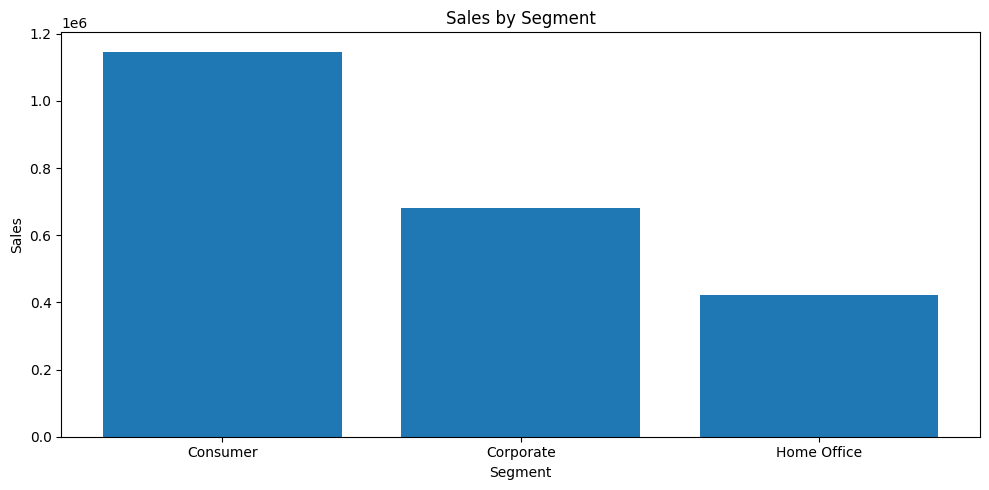

In [36]:
seg_sales = df.groupby('Segment', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False)
print(seg_sales)
bar_chart(seg_sales['Segment'], seg_sales['Sales'], "Sales by Segment", xlabel="Segment")

<h1 style="font-size:20px; color:black; text-align:center;">Sales by Ship Mode (bar)</h1>

        Ship_Mode         Sales
3  Standard Class  1.332336e+06
2    Second Class  4.491990e+05
0     First Class  3.455723e+05
1        Same Day  1.252190e+05


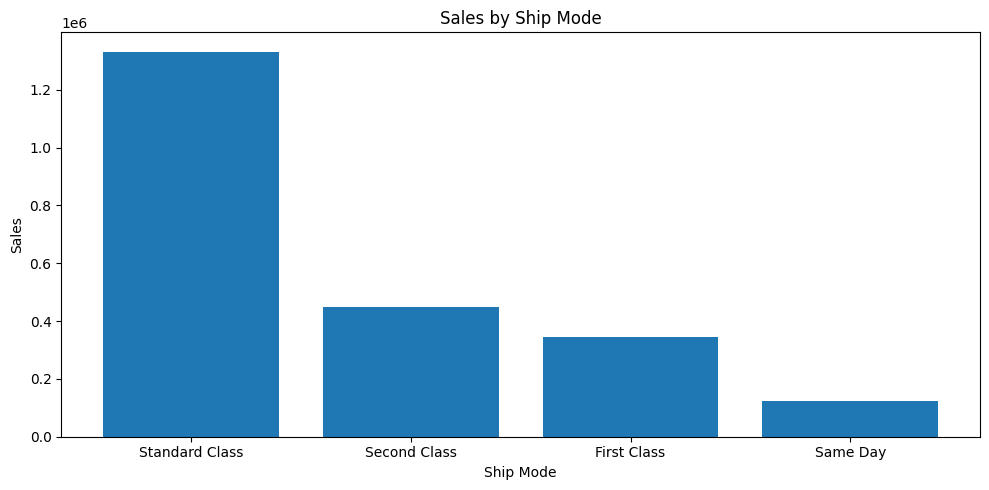

In [39]:
ship_sales = df.groupby('Ship_Mode', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False)
print(ship_sales)
bar_chart(ship_sales['Ship_Mode'], ship_sales['Sales'], "Sales by Ship Mode", xlabel="Ship Mode")

<h1 style="font-size:20px; color:black; text-align:center;">Sales by Category (bar)</h1>

          Category        Sales
2       Technology  825856.1130
0        Furniture  723257.1037
1  Office Supplies  703212.8240


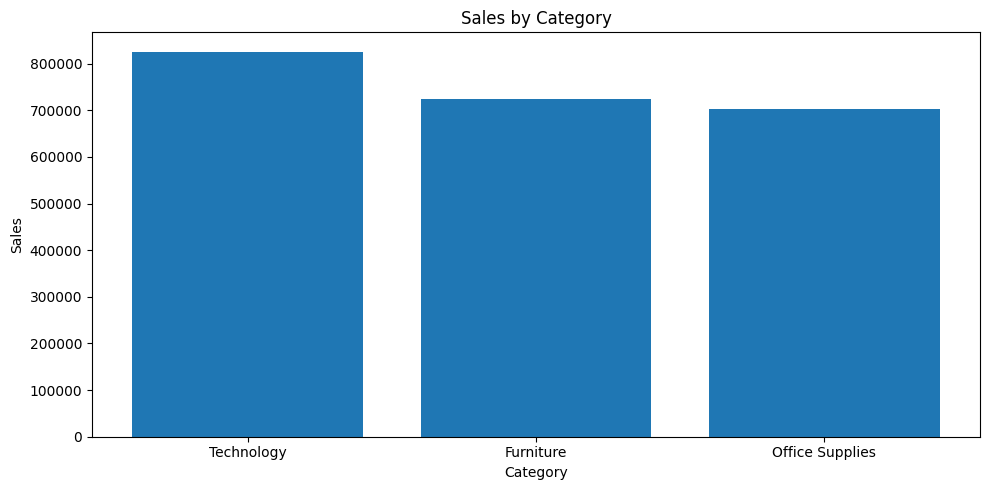

In [40]:
cat_sales = df.groupby('Category', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False)
print(cat_sales)
bar_chart(cat_sales['Category'], cat_sales['Sales'], "Sales by Category", xlabel="Category")

<h1 style="font-size:20px; color:black; text-align:center;">Top 10 Sub-Categories by Sales (bar)</h1>

   Sub_Category        Sales
13       Phones  326487.6980
5        Chairs  321826.1590
14      Storage  217779.1020
16       Tables  202810.6280
3       Binders  200028.7850
11     Machines  189238.6310
0   Accessories  163881.6900
6       Copiers  146248.0940
4     Bookcases  109408.2987
1    Appliances  104075.4630


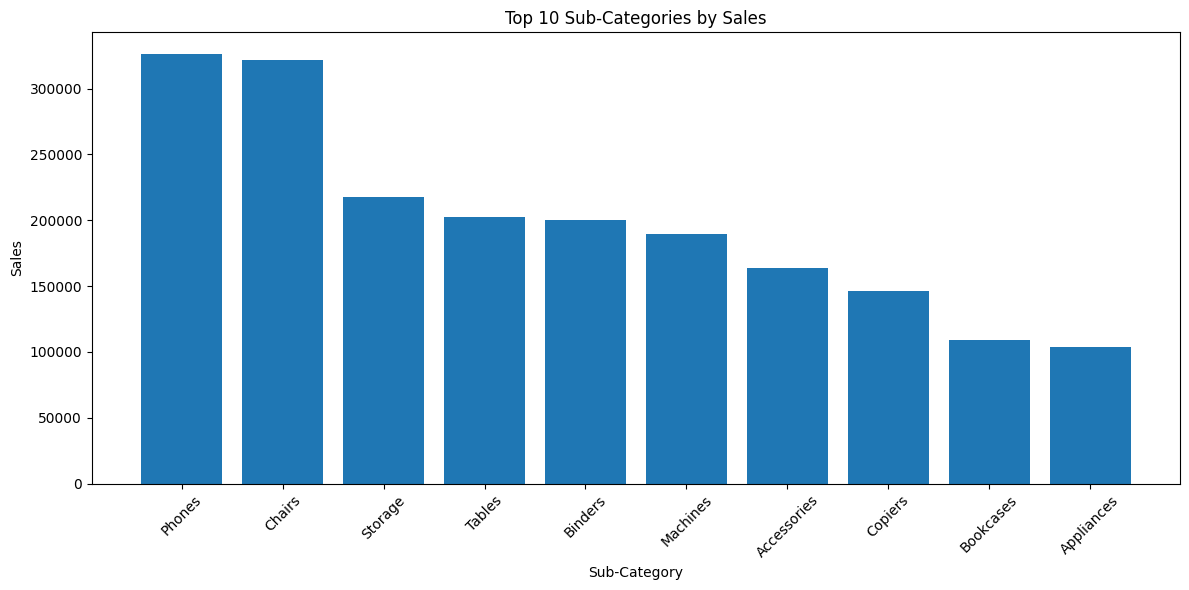

In [41]:
subcat_sales = df.groupby('Sub_Category', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(10)
print(subcat_sales)
bar_chart(subcat_sales['Sub_Category'], subcat_sales['Sales'], "Top 10 Sub-Categories by Sales", xlabel="Sub-Category", rotation=45, figsize=(12,6))

<h1 style="font-size:20px; color:black; text-align:center;">Top 10 States by Sales (bar)</h1>

           State        Sales
3     California  446306.4635
30      New York  306361.1470
41         Texas  168572.5322
44    Washington  135206.8500
36  Pennsylvania  116276.6500
8        Florida   88436.5320
11      Illinois   79236.5170
20      Michigan   76136.0740
33          Ohio   74848.9780
43      Virginia   70636.7200


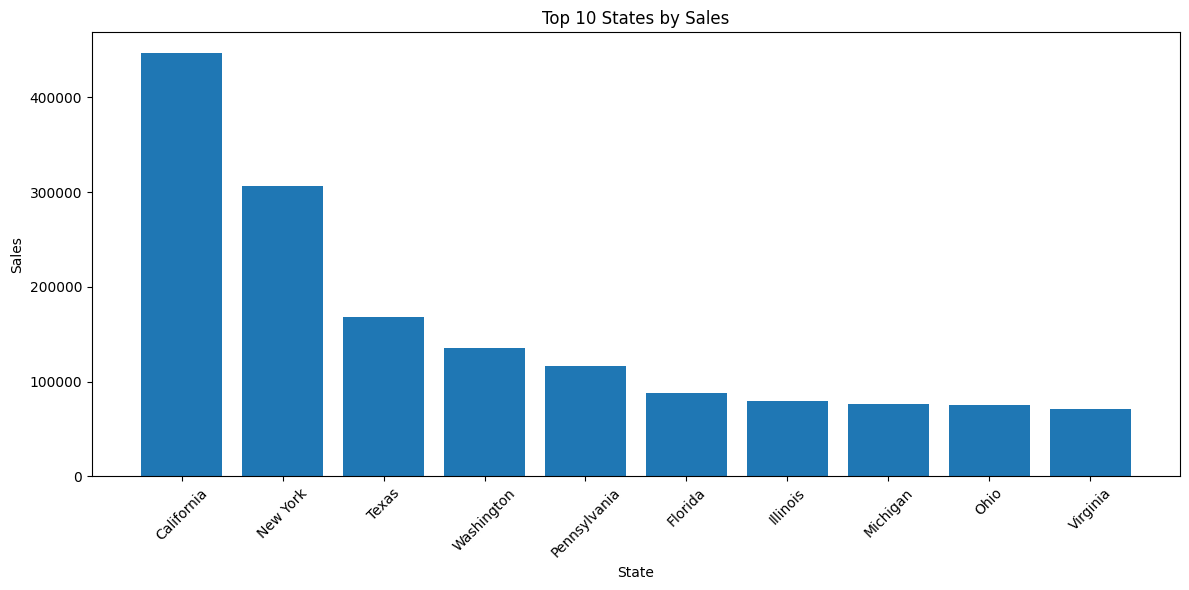

In [42]:
state_sales = df.groupby('State', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(10)
print(state_sales)
bar_chart(state_sales['State'], state_sales['Sales'], "Top 10 States by Sales", xlabel="State", rotation=45, figsize=(12,6))

<h1 style="font-size:20px; color:black; text-align:center;">Top 10 Customers by Sales (bar)</h1>

          Customer_Name      Sales
686         Sean Miller  25043.050
730        Tamara Chand  19052.218
622        Raymond Buch  15117.339
757        Tom Ashbrook  14595.620
6         Adrian Barton  14473.571
441        Ken Lonsdale  14175.229
671        Sanjit Chand  14142.334
334        Hunter Lopez  12873.298
672        Sanjit Engle  12209.438
156  Christopher Conant  12129.072


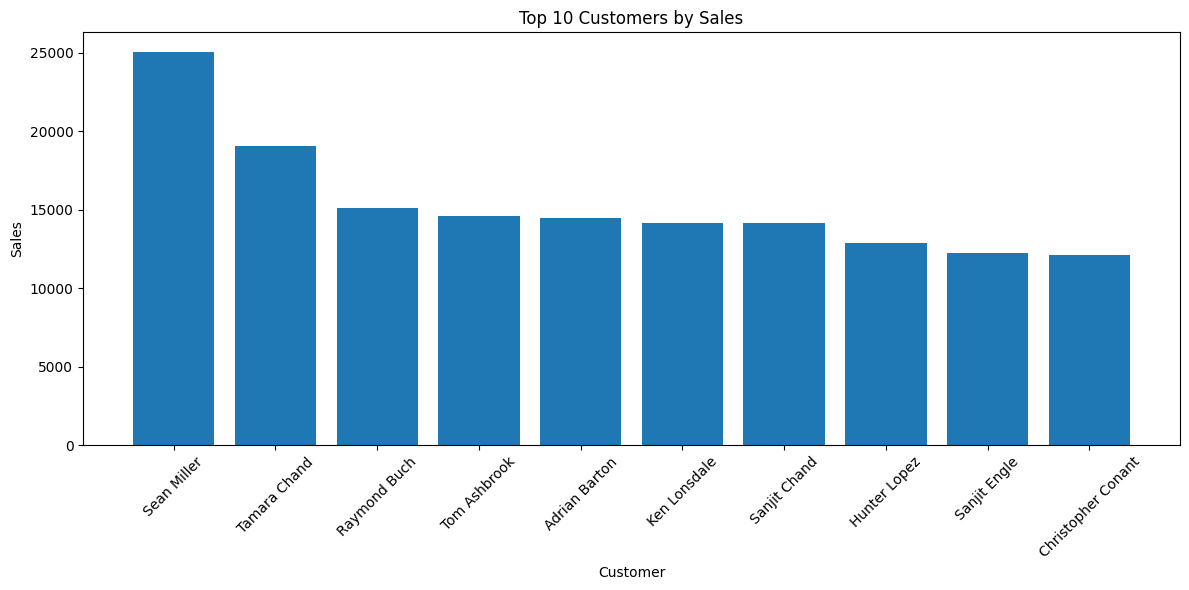

In [43]:
cust_sales = df.groupby('Customer_Name', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(10)
print(cust_sales)
bar_chart(cust_sales['Customer_Name'], cust_sales['Sales'], "Top 10 Customers by Sales", xlabel="Customer", rotation=45, figsize=(12,6))

<h1 style="font-size:20px; color:black; text-align:center;">Shipping Days distribution (bar of counts)</h1>

   Shipping_Days  Orders
0              0     514
1              1     363
2              2    1292
3              3     976
4              4    2706
5              5    2146
6              6    1169
7              7     615


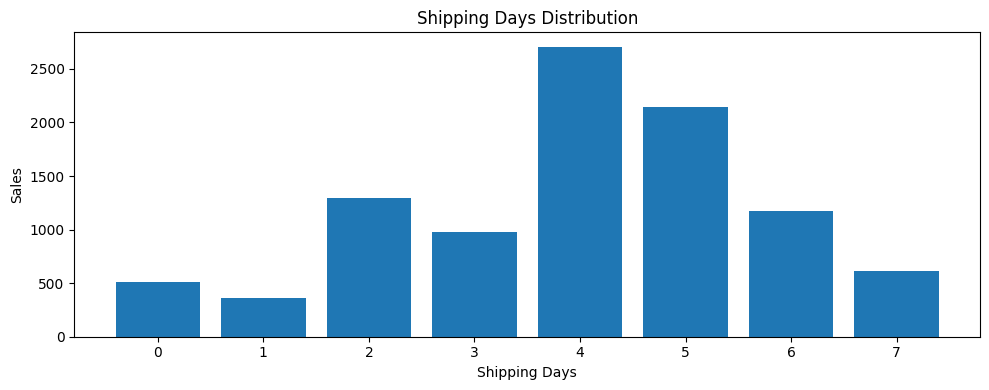

In [44]:
if 'Shipping_Days' in df.columns:
    shipdays = df['Shipping_Days'].value_counts().sort_index().reset_index()
    shipdays.columns = ['Shipping_Days','Orders']
    print(shipdays.head(20))
    # show as bar (x as string for nicer x-axis)
    bar_chart(shipdays['Shipping_Days'].astype(str), shipdays['Orders'], "Shipping Days Distribution", xlabel="Shipping Days", rotation=0, figsize=(10,4))
else:
    print("Shipping_Days not available to plot.")

<h1 style="font-size:20px; color:black; text-align:center;">Monthly Sales Trend — line chart</h1>

  Order_Date      Sales
0 2015-01-01  14205.707
1 2015-02-01   4519.892
2 2015-03-01  55205.797
3 2015-04-01  27625.483
4 2015-05-01  23644.303


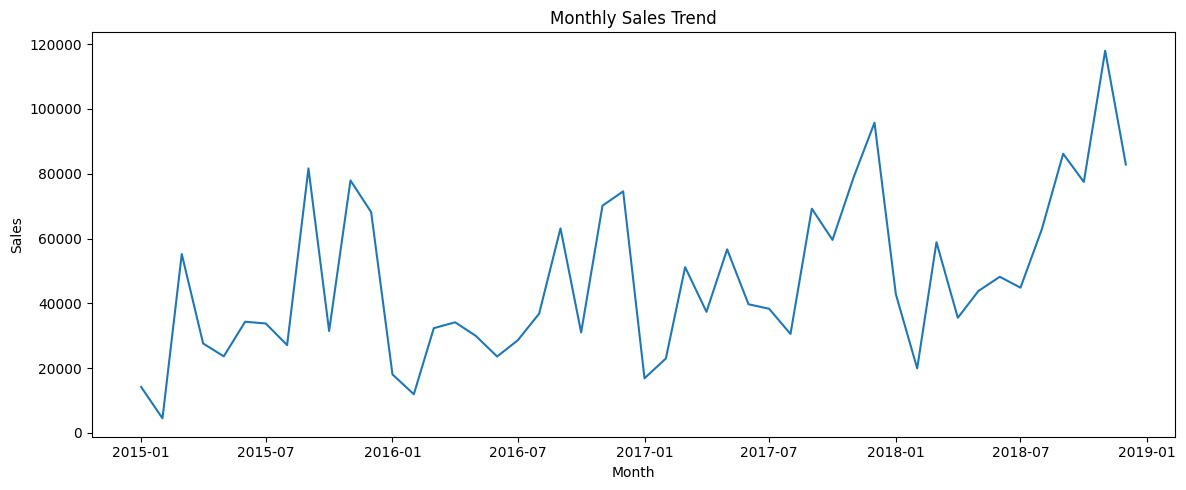

In [45]:
if 'Order_Date' in df.columns:
    monthly = df.set_index('Order_Date').resample('MS')['Sales'].sum().reset_index()
    print(monthly.head())
    plt.figure(figsize=(12,5))
    plt.plot(monthly['Order_Date'], monthly['Sales'])
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Sales")
    plt.tight_layout()
    plt.show()
else:
    print("Order_Date missing.")


<h1 style="font-size:20px; color:black; text-align:center;">Augmented Dickey–Fuller (ADF) test</h1>

In [49]:
if 'Order_Date' in df.columns:
    monthly = df.set_index('Order_Date').resample('MS')['Sales'].sum()
    print(monthly.head())
else:
    print("Order_Date missing.")
    
# Apply Augmented Dickey-Fuller test
result = adfuller(monthly.dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value {key}: {value}")

#Interpretation
if result[1] <= 0.05:
    print("The series is stationary (reject null hypothesis).")
else:
    print("The series is NOT stationary (fail to reject null hypothesis).")

Order_Date
2015-01-01    14205.707
2015-02-01     4519.892
2015-03-01    55205.797
2015-04-01    27625.483
2015-05-01    23644.303
Freq: MS, Name: Sales, dtype: float64
ADF Statistic: -4.424851432311456
p-value: 0.00026817299744329973
Critical Value 1%: -3.5778480370438146
Critical Value 5%: -2.925338105429433
Critical Value 10%: -2.6007735310095064
The series is stationary (reject null hypothesis).


Here I have already tested and found that my monthly sales series is stationary **(ADF stat < critical values, p-value < 0.05)**.

<h1 style="font-size:30px; color:black; text-align:center;">Overall Insight</h1>

In this  business is anchored by **Consumer** segment demand and **Technology products**, with **Phones and Chairs** acting as flagship sub-categories. Geographically, **California and New York** dominate revenue. Operationally, **Standard Class shipping accounts for ~60% of sales**, and the typical delivery window is **4–5 days (avg ≈ 4 days)**, which sets clear expectations for service levels. **The monthly sales series is statistically stationary (ADF p < 0.001)**, which simplifies time-series modeling and forecasting — a solid foundation for building reliable forecasts and running scenario tests (e.g., “what if” analyses by segment, category, or shipping policy).